In [1]:
%pylab inline
from numba import jit, vectorize
from ipywidgets import interact, RadioButtons
import toolz as pt
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
@jit(nopython=True)
def logistic(a, x):
    return -4*a*x*(x-1)

@jit(nopython=True)
def tent(a, x):
    return a*(1-2*abs(x-0.5))

@jit(nopython=True)
def circle(a, x):
    return (2*(x-0.5))%1

#@vectorize(nopython=False)
@jit(nopython=False)
def itr(a, k, f, x):
    i = 0
    while i < k:
        i+=1
        x = f(a, x)
    return x
    

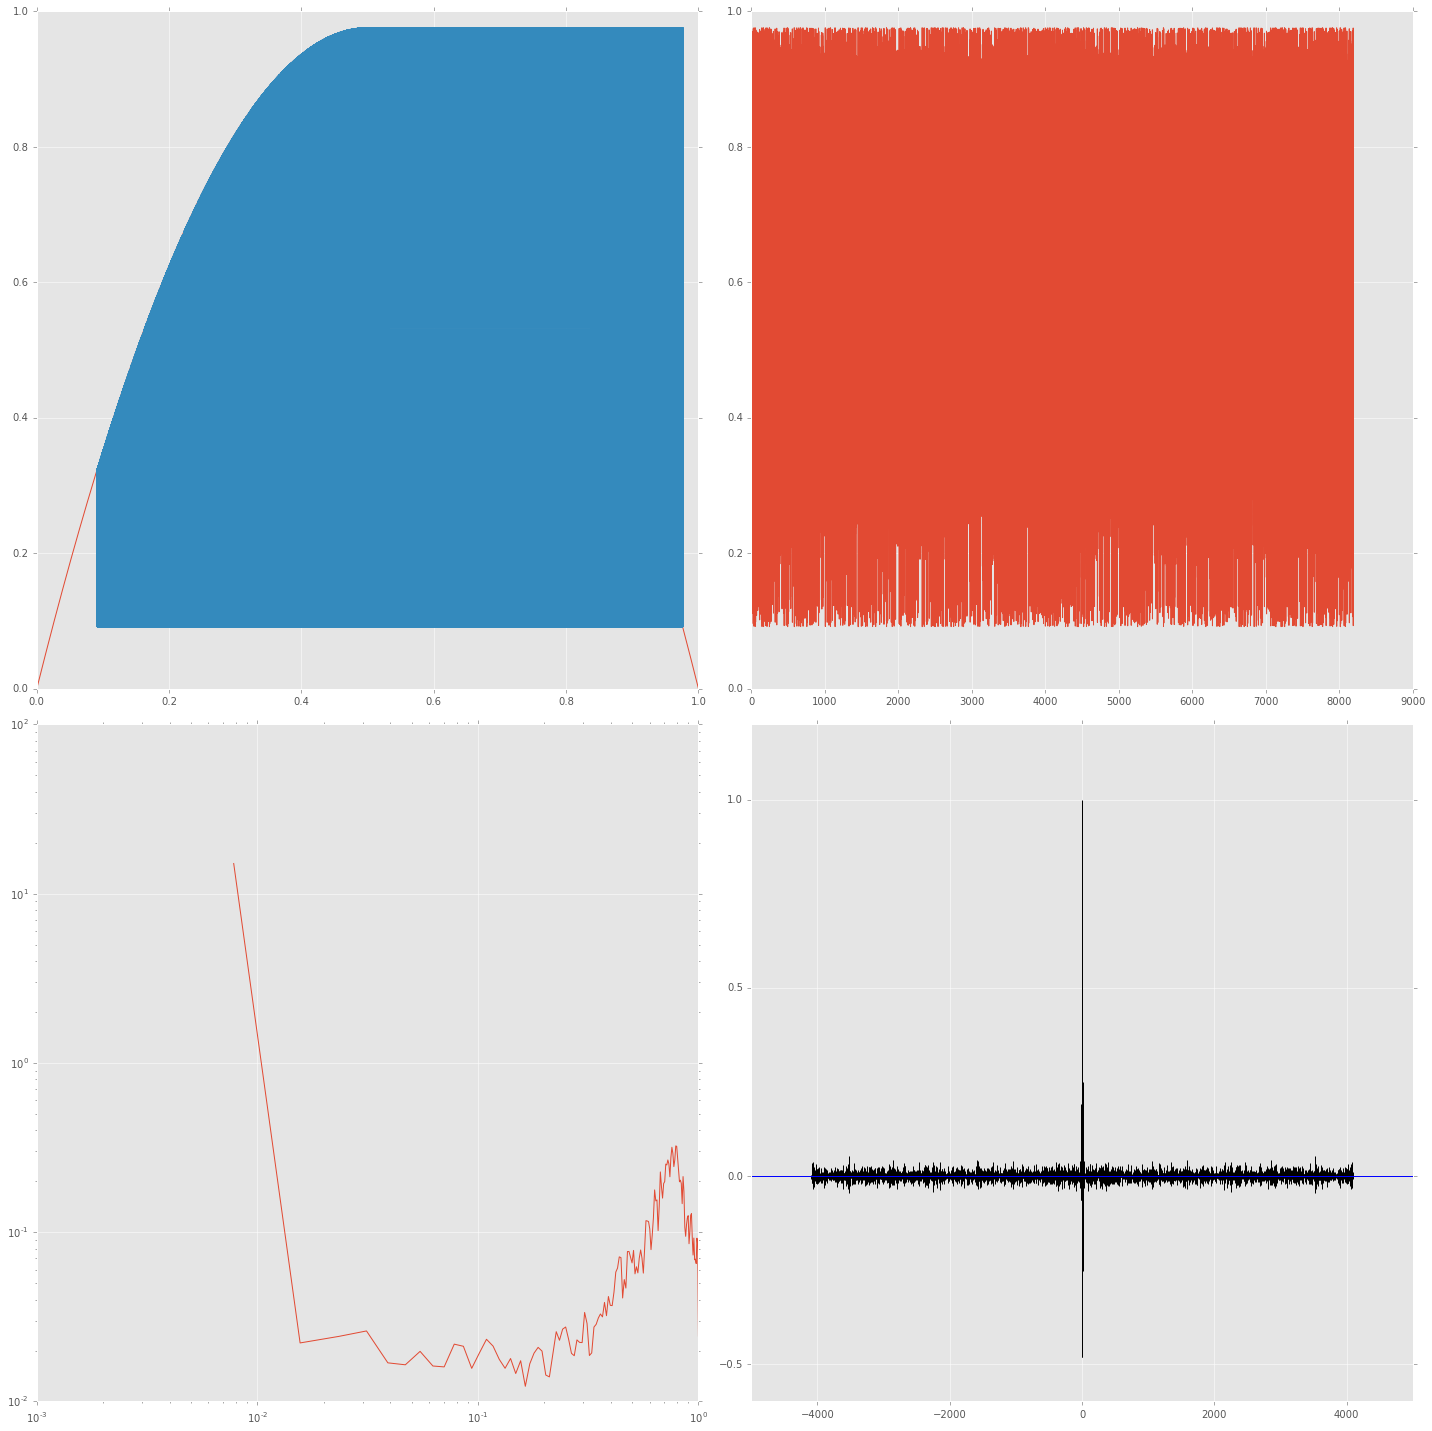

In [12]:
@interact
def view(mapping=RadioButtons(options=dict(circle=circle, logistic=logistic, tent=tent), selected_label="logistic"),
         a=(0.,1.,0.001),  d=(7,20,1),x0=(0.,1.,0.001)):
    fig=figure(figsize=(20,20))
    n = 2**d
    it = pt.iterate(lambda x:mapping(a,x),x0)
    #it = pt.interleave([it,it])
    X=linspace(0,1.,n)
    subplot(222)
    Y=fromiter(it,dtype=float64,count=n)
    plot(Y)
    subplot(223)
    spec=psd(Y);
    cla()
    loglog(spec[1],spec[0])
    subplot(221)
    xlim(0,1)
    ylim(0,1)
    Y=fromiter(pt.interleave([Y,Y]),dtype=float64)[1:]
    plot(X,amap(lambda x:mapping(a,x), X))
    plot(Y[:-1],Y[1:])
    subplot(224)
    acorr(Y-Y.mean(),maxlags=int(n/2))
    fig.tight_layout()
    
    
    

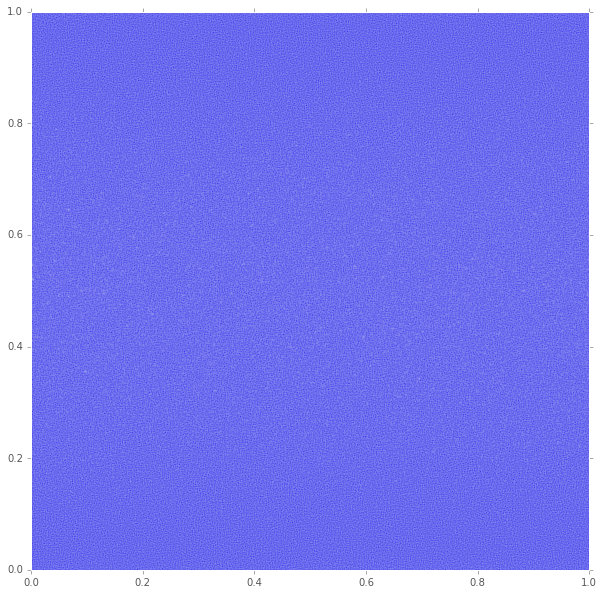

In [8]:
@interact
def view(mapping=RadioButtons(options=dict(circle=circle, logistic=logistic, tent=tent), selected_label="logistic"),
         a=(0.,1.,0.001), k=(0,21,1), d=(4,21,1)):
    
    figure(figsize=(10,10))
    xlim(0,1)
    ylim(0,1)
    n = 2**d
    X = rand(n) #arange(n)/float(n)
    Y = amap(lambda x: itr(a,k,mapping,x), X)
    #Y = iter(a,k,mapping, X)
    #print Y
    scatter(X,Y,alpha=0.1,marker='.')
    
    